# k-Nearest Neighbors (k-NN)

#### Autor: Santiago González Montealegre

It covers the second chapter _Supervised Learning_ of _Introduction to Machine Learning_, section _Supervised Machine Learning Algorithms_.



## Índice

1. 

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import IPython
import scipy as sp
import sklearn as sk
import mglearn

## k-NN Classification

Considerado el más simple algoritmo de ML.

Construir el modelo consiste solo en guardar el training set. 

Para hacer una predicción de un nuevo data point, el algoritmo encuentra los data points más cercanos (_nearest neighbors_) en el training set

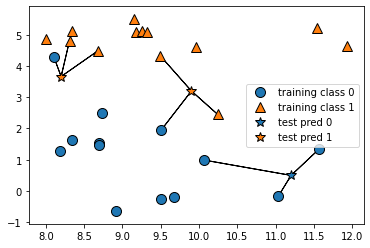

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### 1. Split Data in training and test set

Dividimos el set para el cual conocemos los labels, con el fin de entrenar y poner a prueba el modelo.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Generate Dataset
X, y = mglearn.datasets.make_forge()
X.shape, y.shape

((26, 2), (26,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=0)
print(f'''{X_train.shape}, {y_train.shape}
      {X_test.shape}, {y_test.shape}''')

(19, 2), (19,)
      (7, 2), (7,)


### 2. Create the model

Importamos el tipo de modelo que usaremos y crearemos el modelo junto con los parámetros, tales como el número de vecinos.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
clf = KNeighborsClassifier(n_neighbors=3)

### 3. Fit the model

Ahora ajustamos el clasificador usando el training set. 

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 4. Predict with the model



In [9]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

### 5. Evaluate the model

Para saber qué tan bien generaliza nuestro modelo calculamos la tasa de acierto.

In [10]:
round(clf.score(X_test, y_test), 2)

0.86

### Analyzing KNeighborsClassifier

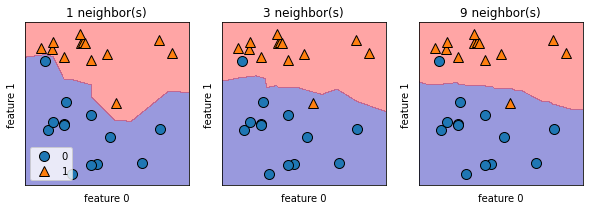

In [11]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit method returns the object self, so we can instantiate
    # fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf,
                                    X,
                                    fill=True,
                                    eps=0.5,
                                    ax=ax,
                                    alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

#### Finding the _sweet spot_

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys(), cancer.data.shape, cancer.target.shape

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 (569, 30),
 (569,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=66)
print(f'''{X_train.shape}, {y_train.shape}
      {X_test.shape} {y_test.shape}''')

(426, 30), (426,)
      (143, 30) (143,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

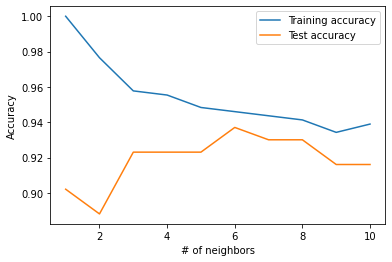

In [16]:
train_accuracy = []
test_accuracy = []

for n_neighbors in range(1, 11):
    # build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(range(1, 11), train_accuracy, label='Training accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test accuracy')
plt.xlabel('# of neighbors')
plt.ylabel('Accuracy')
plt.legend()

## k-NN Regression

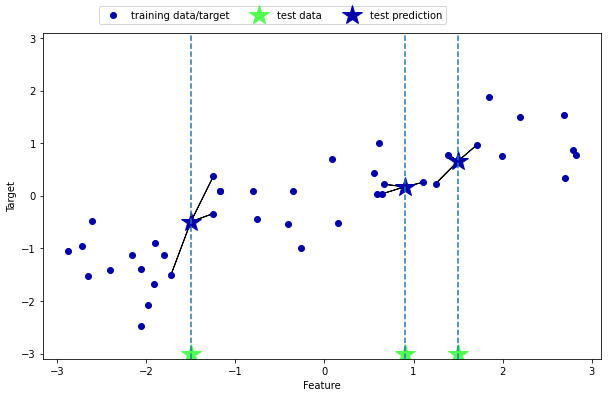

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [19]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [22]:
reg.score(X_test, y_test)

0.8344172446249605

### Analyzing KNeighborsRegressor

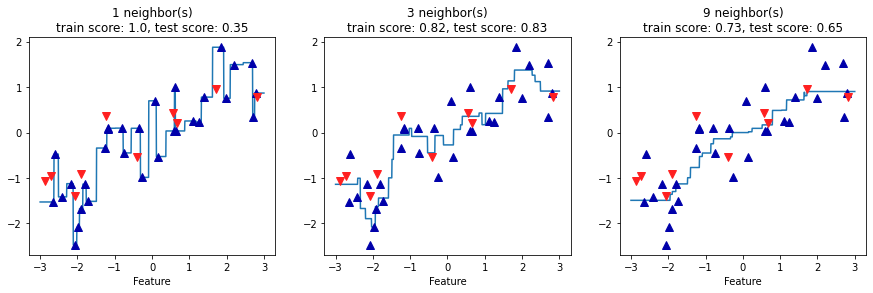

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f'{n_neighbors} neighbor(s)\ntrain score: {round(reg.score(X_train, y_train), 2)}, test score: {round(reg.score(X_test, y_test), 2)}')
    ax.set_xlabel('Feature')